In [2]:
import csb
import glob
import ete3
import pandas as pd
import colour



In [3]:
unihhrs = glob.glob('./aln/*uniprot.hhr')
pdbhhrs = glob.glob('./aln/*uniprot.hhmpdb70.hhr')
all_hhrs = glob.glob('./aln/*.hhmallVall.hhr')
alns = glob.glob('./aln/*aln.fasta')
print(alns)

inputs = glob.glob('./input/*.fasta')
print(inputs)

check = []
pos = [inputs[-1], inputs[1]]
hapcheck =[]

for fasta in pos:
    with open(fasta, 'r') as alin:
        for i,line in enumerate(alin):
            if '>' in line:
                check.append(line.strip())

with open(inputs[-1], 'r') as alin:
    for i,line in enumerate(alin):
        if '>' in line:
            hapcheck.append(line.strip())

pos_clusters=[]
hapclusters =[]
alndict = {}

for aln in alns:
    alndict[aln.split('/')[2].replace('aln.fasta', '')]  = aln

    with open(aln, 'r') as alin:
        for i,line in enumerate(alin):
            if '>' in line:
                if line.strip() in check:
                    pos_clusters.append(aln)
                    break
    print(aln)


for aln in alns:
    with open(aln, 'r') as alin:
        for i,line in enumerate(alin):
            if '>' in line:
                if line.strip() in hapcheck:
                    hapclusters.append(aln)
                    break
    print(aln)

pos_clusters= [p.split('/')[2].replace('aln.fasta', '')  for p in pos_clusters ]
hapclusters= [p.split('/')[2].replace('aln.fasta', '')  for p in hapclusters ]
 
print(pos_clusters)
print(hapclusters)

['./aln/57aln.fasta', './aln/51aln.fasta', './aln/76aln.fasta', './aln/40aln.fasta', './aln/60aln.fasta', './aln/67aln.fasta', './aln/64aln.fasta', './aln/13aln.fasta', './aln/65aln.fasta', './aln/59aln.fasta', './aln/49aln.fasta', './aln/52aln.fasta', './aln/26aln.fasta', './aln/11aln.fasta', './aln/36aln.fasta', './aln/14aln.fasta', './aln/33aln.fasta', './aln/74aln.fasta', './aln/32aln.fasta', './aln/61aln.fasta', './aln/31aln.fasta', './aln/18aln.fasta', './aln/16aln.fasta', './aln/77aln.fasta', './aln/28aln.fasta', './aln/85aln.fasta', './aln/73aln.fasta', './aln/17aln.fasta', './aln/93aln.fasta', './aln/29aln.fasta', './aln/25aln.fasta', './aln/81aln.fasta', './aln/75aln.fasta', './aln/88aln.fasta', './aln/10aln.fasta', './aln/5aln.fasta', './aln/37aln.fasta', './aln/41aln.fasta', './aln/70aln.fasta', './aln/55aln.fasta', './aln/82aln.fasta', './aln/58aln.fasta', './aln/4aln.fasta', './aln/0aln.fasta', './aln/9aln.fasta', './aln/30aln.fasta', './aln/91aln.fasta', './aln/92aln.fas

In [4]:

#visualize the taxonomic spread of an HHR

import uniprot
from csb.bio.io.hhpred import HHOutputParser
import networkx as nx
from matplotlib import pyplot as plt

red = colour.Color("red")
blue = colour.Color("blue")
colorlist = list(red.range_to(blue, len(all_hhrs)))
colorlist =[c.rgb for c in colorlist]

colhhr={}
taxmap={}
results = {}

def fmt_name(name):
    return name.replace('aln.hhm', '')
NX = nx.Graph()
edges = []

for i,hhr in enumerate(all_hhrs):
    profile = HHOutputParser(alignments=False).parse_file(hhr)
    colhhr[hhr]=i
    #filter hits. eval length proba
    for hit in profile:
        if (hit.probability > .9) & (hit.length> 500):
            if hit.id != profile.query_name:
                #print(hit.probability)
                #print(hit.length)
                #print(fmt_name(profile.query_name) + '-' + fmt_name(hit.id))
                NX.add_edge(fmt_name(profile.query_name) , fmt_name(hit.id) , weight=20*hit.score)

                



#add squares/size to taxa


In [5]:
hap2=[]
viral=[]
eff=[]
for hhr in unihhrs + pdbhhrs :
    profile = HHOutputParser(alignments=False).parse_file(hhr)
    #print(profile.query_name)
    hits = 0
    hitlist = []
    for hit in profile:
        if (hit.probability > .9) & (hit.length> 500):
            hits +=1
            hitlist.append(hit.id)
    
    
    with open( hhr , 'r') as hhin:
        for line in hhin:
            if '>' in line:
                name = line.split()[0].replace('>','')
                if name in hitlist and 'hap2' in line.lower() in line.lower():
                    #print(name)
                    #print(line)
                    hap2.append(profile.query_name.split('aln')[0])
                    
                if name in hitlist and 'envelope' in line.lower() and 'virus' in line.lower():
                    #print(name)
                    #print(line)
                    viral.append(profile.query_name.split('aln')[0])
hap2 = set(hap2)
viral = set(viral)
print(hap2)
print(viral)

{'53', '28', '12', '32', '74', '69', '2', '57', '52', '8'}
{'36'}


5
0
24
1
2
2
2
3
2
4
4
['#ff0000', '#ff0000', '#ff0000', '#ff0000', '#ff0000', '#ff0000', '#ff0000', '#ff0000', '#ff0000', '#ff0000', '#ff0000', '#ff0000', '#ff0000', '#ff0000', '#ff0000', '#ff0000', '#ff0000', '#ff0000', '#ff0000', '#ff0000', '#ff0000', '#ff0000', '#ff0000', '#ff0000', '#ff0000', '#ff0000', '#ff0000', '#ff0000', '#ff0000', '#ff0000', '#ff0000', '#ff0000', '#ff0000', '#ff0000', '#ff0000', '#ff0000', '#ff0000', '#ff0000', '#ff0000', '#ff0000', '#ff0000', '#ff0000', '#ff0000', '#ff0000', '#ff0000', '#ff0000', '#ff0000', '#ff0000', '#ff0000', '#ff0000', '#ff0000', '#ff0000', '#ff0000', '#ff0000', '#ff0000', '#ff0000', '#ff0000', '#ff0000', '#ff0000', '#ff0000', '#ff0000', '#ff0000', '#ff0000', '#ff0000', '#ff0000', '#ff0000', '#ff0000', '#ff0000', '#ff0000', '#ff0000', '#ff0000', '#ff0000', '#ff0000', '#ff0000', '#ff0000', '#ff0000', '#ff0000', '#ff0000', '#ff0000', '#ff0000', '#ff0000', '#ff0000', '#ff0000', '#ff0000', '#ff0000', '#ff0000', '#ff0000', '#ffff00', '#00ff00

/home/cactuskid/.local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


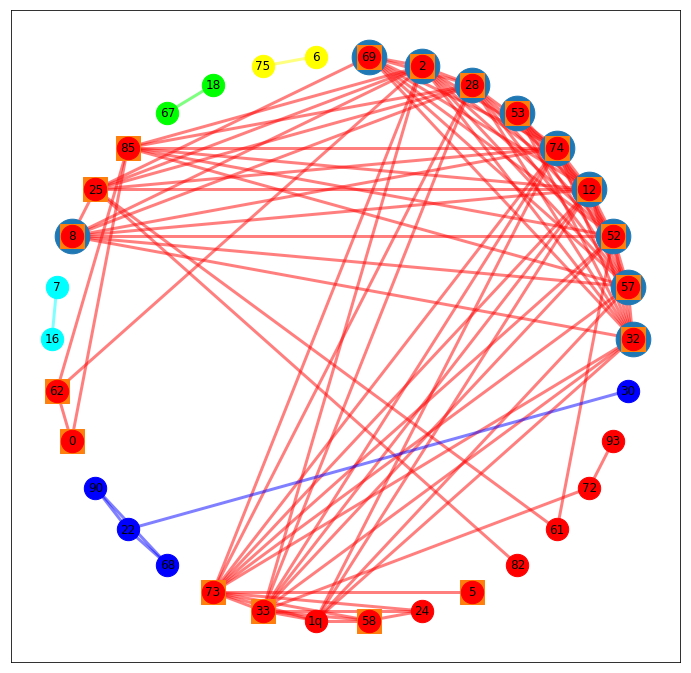

In [6]:
import numpy as np




fig = plt.figure(figsize=(12,12)) 

plt.tick_params(
axis = 'both',
which='both',      # both major and minor ticks are affected
bottom=False,      # ticks along the bottom edge are off
top=False,         # ticks along the top edge are off
labelbottom=False,
labelleft=False,
left=False

)



subs = [s for s in nx.connected_component_subgraphs(NX)]
print(len(subs))
red = colour.Color("red")
blue = colour.Color("blue")
colorlist = list(red.range_to(blue, len(subs)))
colorlist =[c.hex_l for c in colorlist]

colors=[]
edges=[]
#pos=nx.spring_layout(NX, weight='weight')
pos=nx.circular_layout(NX)
for i,sub in enumerate(subs):
    print(i)
    print(len(sub.nodes()))
    nx.draw_networkx_nodes(sub,nodelist=sub.nodes(),pos= pos , node_size= 500, node_color= colorlist[i])
    nx.draw_networkx_labels(sub, nodelist=sub.nodes(), pos = pos , fontsize = 30)
    colors+= [ colorlist[i] ] * len(sub.edges())
    edges+= [ e for e in sub.edges()]
print(colors)
print(edges)
nx.draw_networkx_edges(NX, edgelist = edges ,pos = pos , width=3 ,alpha=.5 , edge_color = colors )

hap2nodes = set(pos.keys()).intersection(hap2)
#viralnodes = set(pos.keys()).intersection(viral)
plt.scatter( [ pos[node][0] for node in hap2nodes ], [pos[node][1] for node in hap2nodes ] , s= 1200, marker='o')
plt.scatter( [ pos[node][0] for node in pos_clusters if node in pos ], [pos[node][1] for node in pos_clusters if node in pos] , s= 600, marker='s')

#plt.scatter( [ pos[node][0] for node in viralnodes ], [pos[node][1] for node in viralnodes ] , s= 900, marker='o')


plt.show()

        

In [19]:
globalcounts = {}
clustercounts = {}
clustercounts['Hap2'] = {}
clustercounts['Non Hap2'] = {}
            
for node in subs[0].nodes():
    if node in hapclusters:
        print('hap' + node)
        nodetype = 'Hap2'
    else: 
        print('arch' + node)
        nodetype = 'Non Hap2'
    count = 0
    
    try:
        with open( alndict[node] , 'r') as alnin:
            for i,l in enumerate(alnin):
                if '>' in l:
                    if 'mc' not in l:
                        if 'scaffold' in l or 'contig' in l or 'meta' in l or 'gb' in l:
                            #print(l)
                            for counts in [globalcounts, clustercounts[nodetype]]:
                                if l.split('_')[0] in counts:
                                    counts[l.split('_')[0] ] +=1
                                else:     
                                    counts[l.split('_')[0] ]=1
                        else:
                            for counts in [globalcounts, clustercounts[nodetype]]:
                                if 'attributed' in counts:
                                    counts['attributed'] +=1
                                else:
                                    counts['attributed'] = 0
                            if nodetype =='FsxA':
                                print(l)
    except:
        pass
    #print(globalcounts)
#print(clustercounts)
mapper = { name:i for i,name in enumerate(globalcounts.keys()) }
clustervecs ={}
print(mapper)
for c in clustercounts:
    clustervecs[c] = np.zeros( len(mapper))
    for n in clustercounts[c]:
        clustervecs[c][mapper[n]]+= clustercounts[c][n]
print(clustervecs)


hap32
hap57
hap52
hap12
hap74
hap53
hap28
hap2
hap69
hap85
hap25
hap8
hap62
hap0
arch73
arch33
arch1q
arch58
arch24
arch5
arch82
arch61
arch72
arch93
{'attributed': 0, '>COG998Drversion2': 1, '>ThiBioDrversion2': 2, '>Dee2metaT': 3, '>APCry1669192522': 4, '>LauGreDrversion4': 5, '>APThiThiocy': 6, '>JI9StandDraft': 7, '>APCry1669189241': 8, '>APWor7970452357': 9, '>APFre7841882654': 10, '>JI10StandDraft': 11, '>KBSSwiStaDraftv2': 12, '>DEB19': 13, '>688.fasta': 14, '>APLak6261682215': 15, '>ETNmetMinimDraft': 16, '>LauGreSuBDMM15SN': 17, '>DeetaT': 18, '>SaaInlStandDraft': 19, '>APGre2960657404': 20, '>APCry1669189000': 21, '>APGre2960657444': 22, '>KNS10NT17metaT': 23, '>ADWX01.1.fsa': 24, '>APAra0007618257': 25, '>GWRWMinimDraft': 26, '>APLow6443716910': 27, '>JI71714CRNA': 28, '>APGre2960657468': 29, '>APCry1669191515': 30, '>APCry1669190731': 31, '>JI71714B2RNA': 32, '>APCry1669192806': 33, '>MesohylFT': 34, '>APCry1669192319': 35, '>APCry1669189034': 36, '>AntAceMinimDraft': 37, '

In [20]:

newkeys = list(globalcounts.keys())[1:]
print(newkeys)
mapper2 = { name:i for i,name in enumerate(newkeys) }
clustervecs2 ={}
                              
for c in clustercounts:
    clustervecs2[c] = np.zeros( len(mapper2))
    for n in clustercounts[c]:
        try:
            clustervecs2[c][mapper2[n]]+= clustercounts[c][n]
        except:
            print(n)
            

print(clustervecs2)
print(globalcounts)
print(len(globalcounts))

['>COG998Drversion2', '>ThiBioDrversion2', '>Dee2metaT', '>APCry1669192522', '>LauGreDrversion4', '>APThiThiocy', '>JI9StandDraft', '>APCry1669189241', '>APWor7970452357', '>APFre7841882654', '>JI10StandDraft', '>KBSSwiStaDraftv2', '>DEB19', '>688.fasta', '>APLak6261682215', '>ETNmetMinimDraft', '>LauGreSuBDMM15SN', '>DeetaT', '>SaaInlStandDraft', '>APGre2960657404', '>APCry1669189000', '>APGre2960657444', '>KNS10NT17metaT', '>ADWX01.1.fsa', '>APAra0007618257', '>GWRWMinimDraft', '>APLow6443716910', '>JI71714CRNA', '>APGre2960657468', '>APCry1669191515', '>APCry1669190731', '>JI71714B2RNA', '>APCry1669192806', '>MesohylFT', '>APCry1669192319', '>APCry1669189034', '>AntAceMinimDraft', '>YelNatPaOPRAMG01', '>RifOxyB1', '>WorMetDrversion2', '>LFUF01.1.fsa', '>PlaIllAssembly', '>KBSMisStandDraft', '>RifCSPhighO2', '>DewCreStandDraft', '>APAra7269097289', '>MDTD01.2.fsa', '>JI102314A2RNA', '>LSQX01.2.fsa', '>887.fasta', '>MTBAKSStandDraft', '>RhiMethySRZTD1v2', '>GraSoiStandDraft', '>RhiMet

[ 0 37  3 18 16 11 45  5 53 26  7 54 22 63 60 52  1 57 17 23 44 34 51 55
 31  2 12  6 24 30 29  4 28 27 25 32 15  9 10 21 20 19 13 14  8 77 33 35
 75 74 73 72 71 70 69 68 67 66 65 64 62 61 59 58 56 50 49 48 47 46 43 42
 41 40 39 76 36 38]


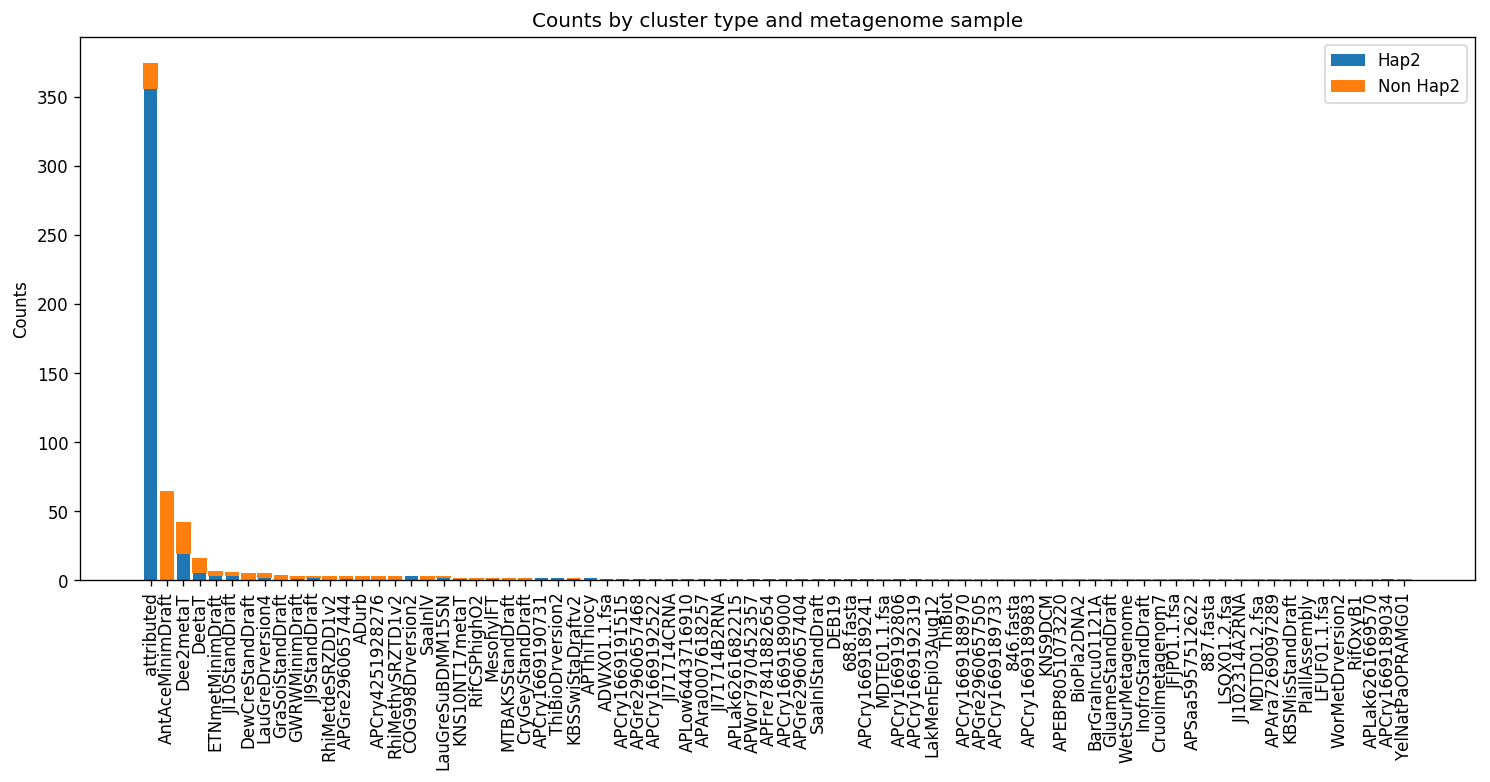

/home/cactuskid/.local/lib/python3.6/site-packages/ipykernel_launcher.py:33: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


[36  2 17 15 10  4 44 52 62 56 16 59 51  0 25 21 53  6 22 30 43 50 54 33
  1 11  5 23 29  3 28 27 26 24 31 14  8  9 20 19 18 12 13  7 76 32 34 74
 73 72 71 70 69 68 67 66 65 64 63 61 60 58 57 55 49 48 47 46 45 42 41 40
 39 75 37 35 38]


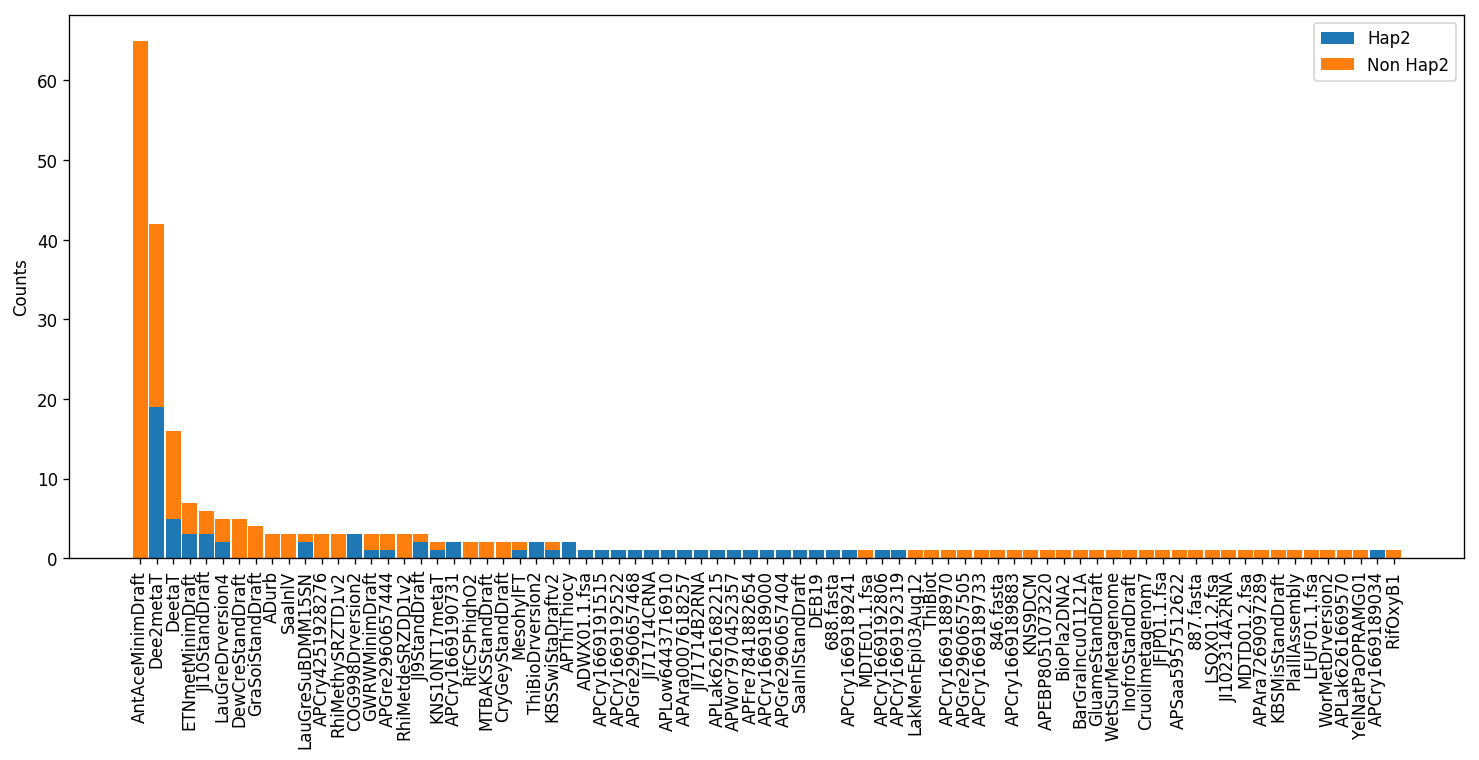

In [22]:
import numpy as np
import matplotlib.pyplot as plt

ind = np.arange(len(globalcounts))
sortindex = np.argsort(list(globalcounts.values()), )[::-1]
print(sortindex)

names = [ n.replace('>','') for n in list(globalcounts.keys())]
names = np.asarray(names)[sortindex]

# the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence
plots = []
prevcluster = None
plt.figure( figsize=(15 , 6), dpi=120)

for cluster in clustervecs:
    if prevcluster:
        plots.append( plt.bar(ind, clustervecs[cluster][sortindex], bottom=clustervecs[prevcluster][sortindex],  width =.9) )
    else:
        plots.append( plt.bar(ind, clustervecs[cluster][sortindex]) )
    prevcluster = cluster

plt.ylabel('Counts')
plt.title('Counts by cluster type and metagenome sample')
plt.xticks(ind, names , rotation = 90 , fontsize = 10)
plt.legend(plots, clustervecs.keys() )
plt.savefig('clusterounts1.svg')

plt.show()


sortindex = np.argsort(np.sum( np.vstack(clustervecs2.values()  ) , axis = 0 ) )[::-1]
print(sortindex)

ind = np.arange(len(newkeys))    # the x locations for the groups


newkeys = [ n.replace('>', '') for n in newkeys]
names = np.asarray(newkeys)[sortindex]

plt.figure( figsize=(15, 6), dpi=120)

prevcluster = None
for cluster in clustervecs2:
    if prevcluster:
        plots.append( plt.bar(ind, clustervecs2[cluster][sortindex], bottom=clustervecs2[prevcluster][sortindex] , width =.9) )
    else:
        plots.append( plt.bar(ind, clustervecs2[cluster][sortindex] ,  width =.9)  )
    prevcluster = cluster

    
plt.ylabel('Counts')
plt.xticks(ind, names , rotation = 90 , fontsize = 10)
plt.legend(plots, list(clustercounts.keys()) )
plt.savefig('clusterounts2.svg')
plt.show()


In [31]:
count = 0 
with open( 'concat.fasta' , 'w') as clusterout:
    for c in subs[0].nodes():
        try:
            with open( alndict[c], 'r') as alnin:
                for i,line in enumerate(alnin):
                    if '>' not in line:
                        clusterout.write(line.replace('-','').strip())
                        if i<10:
                            print(line.replace('-','').strip())
                    else:
                        if i<10:
                            print(line)
                        count +=1

                        clusterout.write('\n')
                        clusterout.write(line)
                    
        except:
            print(c)
        

>A0A1D6ETG7










>A0A2G3AE32



MKPPILLLFFLLC
FLLQYASAIQILSKSKLQKCEKVSDSNSLNCTNKVIIDLAVPSESSGNEASL
VAEIVEVEENSSSNMRTLRVPPVVTINKSAAYALYELTYIRDVAYKPQEFHVNTRKCEP
DAGADVVQIC
ERLRDENGHIIENTQPTCCPCGDQRRVPSSCGNFF
DKMTKGKRNTAHCLRFPDDWFHVFGIGQRSVGFSIRIDVKKQSQNSEVIVGPDNRTAT
SSDNFLRVNLVGDYVGYTDLPSLEDLYLVIPRQGGPGQPQNLGSN
>A0A0E0EU11

MAPRRRRRRAARPSRPLLILALLAAAVNNFAPAGGVEVLAKSRLESCA
RGGSDDGRDRLTCDSKIVVDLAVPSGS
SGGEASLVARVAEVEENGTEEGEMPIRDPLIITINKSEVYALYDLTYLRDVA
YKPEEKYVKTRKCEPEAGANVVKSCESLFAALVGLTAVSLHLVETFLIKWRKEKLTQLT
VYVFQMIGFMFLILGEDPFGSEVIVGPENR
TVVSEDSSLRVNLVGEFAGYTSLPSLENFYLVTPRKGVGGGQPQVLGDDFSRWMLLERVL
FTLDGLECSKIGVGYEAFRSQPNFCSSPLDSCLSDQLSKFWEIDKNRVNNSQPPQYVVLG
KFERINQYPNAGVHTFSVGIPEVLNTNLMIELSADDIEYVYQRSSGKIISINISSFEALS
QVGSARVKTKNIGKLEASYSLTFDCLSGINPVEEQYFIMKPDEELIRSFDLRSSTDQASN
>A0A2R6WQH5


MEKSSDGTSCLRTGSR
IILYLVLLLFPVFEKVKSDALLSSWLVNCTRHQHEKVEKEIDCIKKMLLHFSID
NGKSGESDTIETFVTQVREYNGGSRDLEEPYRITMYKSDIY
VQYPLQFLQSFNGNPHEVESFAHNCKDDSKDKTP
NCGWLYNKAGEKVKDSQGFCCLCTVKDKLPPWLGGESLPRRSK